In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [ ]:
# 1. Load Data
df = pd.read_csv('data_sensors.csv')
sensor_cols = [f'Sensor {i}' for i in range(20)]

# 2. Data Overview & Missing Values
print("--- Data Overview ---")
print(df.info())

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sensor 0   1600 non-null   float64
 1   Sensor 1   1600 non-null   float64
 2   Sensor 2   1600 non-null   float64
 3   Sensor 3   1600 non-null   float64
 4   Sensor 4   1600 non-null   float64
 5   Sensor 5   1600 non-null   float64
 6   Sensor 6   1600 non-null   float64
 7   Sensor 7   1600 non-null   float64
 8   Sensor 8   1600 non-null   float64
 9   Sensor 9   1600 non-null   float64
 10  Sensor 10  1600 non-null   float64
 11  Sensor 11  1600 non-null   float64
 12  Sensor 12  1600 non-null   float64
 13  Sensor 13  1600 non-null   float64
 14  Sensor 14  1600 non-null   float64
 15  Sensor 15  1600 non-null   float64
 16  Sensor 16  1600 non-null   float64
 17  Sensor 17  1600 non-null   float64
 18  Sensor 18  1600 non-null   float64
 19  Sensor 19  1600 non-null  

In [ ]:
print("\n--- Duplicate rows ---")
print(df.duplicated().sum())


--- Duplicate rows ---
0


In [ ]:
n_total = len(df)
n_labeled = df["Label"].notna().sum()
print(f"\nTotal rows: {n_total:,} | Labeled: {n_labeled:,} ({n_labeled/n_total:.1%}) | Unlabeled: {n_total-n_labeled:,}")


Total rows: 1,600 | Labeled: 40 (2.5%) | Unlabeled: 1,560


In [ ]:
# Checking specifically for missing data
missing = df[df.columns[:-1]].isnull().sum()
print("\n--- Missing Values Report ---")
if missing.any():
    print(missing[missing > 0])
else:
    print("No missing values found in the feature set.")


--- Missing Values Report ---
No missing values found in the feature set.


In [ ]:
# 3. Descriptive Statistics
print("\n--- Descriptive Statistics (Sensors) ---")
# This helps identify scale, mean, and potential range issues
print(df[sensor_cols].describe())


--- Descriptive Statistics (Sensors) ---
          Sensor 0     Sensor 1     Sensor 2     Sensor 3     Sensor 4  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     -0.003901     0.010692     0.003611     0.016913     0.006504   
std       0.578326     0.580784     0.359632     0.583571     0.570841   
min      -0.998098    -0.992518    -0.800000    -0.999775    -0.999870   
25%      -0.507756    -0.488596    -0.259969    -0.504151    -0.485490   
50%       0.004809     0.017735     0.000516     0.051528     0.000811   
75%       0.476584     0.513715     0.270990     0.512762     0.495880   
max       0.999610     0.999463     0.800000     0.999733     0.992920   

          Sensor 5     Sensor 6     Sensor 7     Sensor 8     Sensor 9  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     -0.035332     0.002607    -0.023096     0.014207     0.001201   
std       0.593607     0.572523     0.588614     0.579928     0.60269

In [ ]:
# 4. Outlier Detection (using the Interquartile Range - IQR method)
Q1 = df[sensor_cols].quantile(0.25)
Q3 = df[sensor_cols].quantile(0.75)
IQR = Q3 - Q1
# Identifying points outside 1.5 * IQR
outliers = ((df[sensor_cols] < (Q1 - 1.5 * IQR)) | (df[sensor_cols] > (Q3 + 1.5 * IQR))).sum()
print("\n--- Outlier Counts per Sensor ---")
print(outliers)


--- Outlier Counts per Sensor ---
Sensor 0     0
Sensor 1     0
Sensor 2     0
Sensor 3     0
Sensor 4     0
Sensor 5     0
Sensor 6     0
Sensor 7     0
Sensor 8     0
Sensor 9     0
Sensor 10    0
Sensor 11    0
Sensor 12    0
Sensor 13    0
Sensor 14    0
Sensor 15    0
Sensor 16    0
Sensor 17    0
Sensor 18    0
Sensor 19    0
dtype: int64


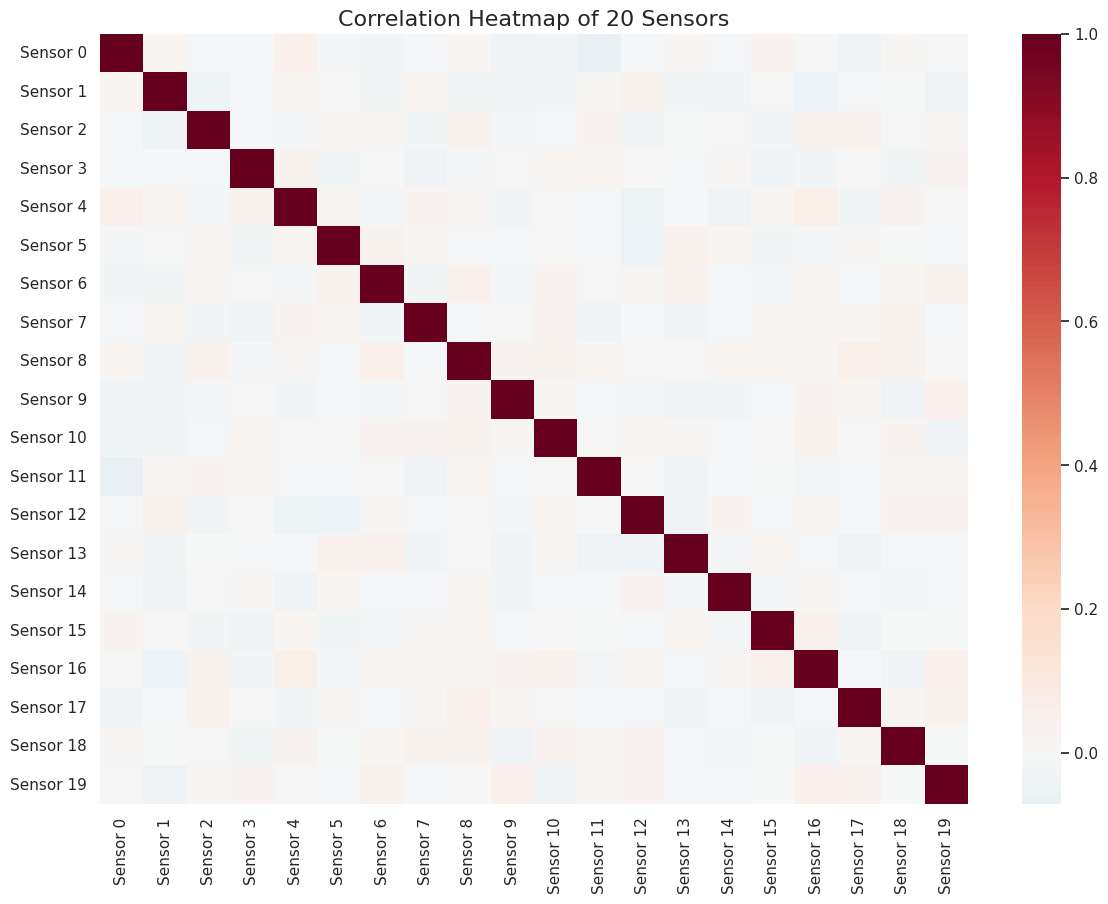

In [ ]:

# A. Correlation Heatmap
# To see if sensors are redundant or have strong relationships
plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of 20 Sensors', fontsize=16)
plt.savefig('eda_correlation_heatmap.png')

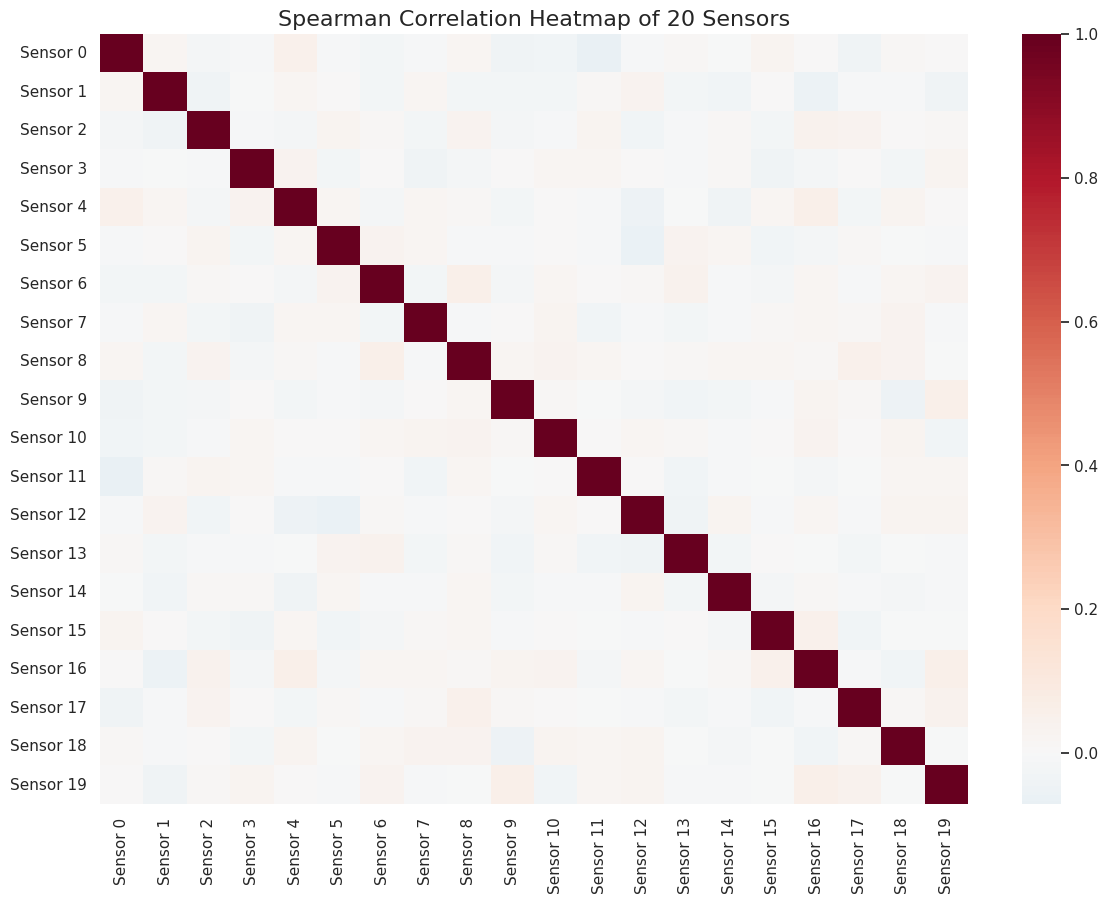

In [ ]:

# A. Spearman Correlation Heatmap
# To see if sensors are redundant or have strong relationships
plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr(method="spearman")
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
plt.title('Spearman Correlation Heatmap of 20 Sensors', fontsize=16)
plt.savefig('eda_sp_correlation_heatmap.png')

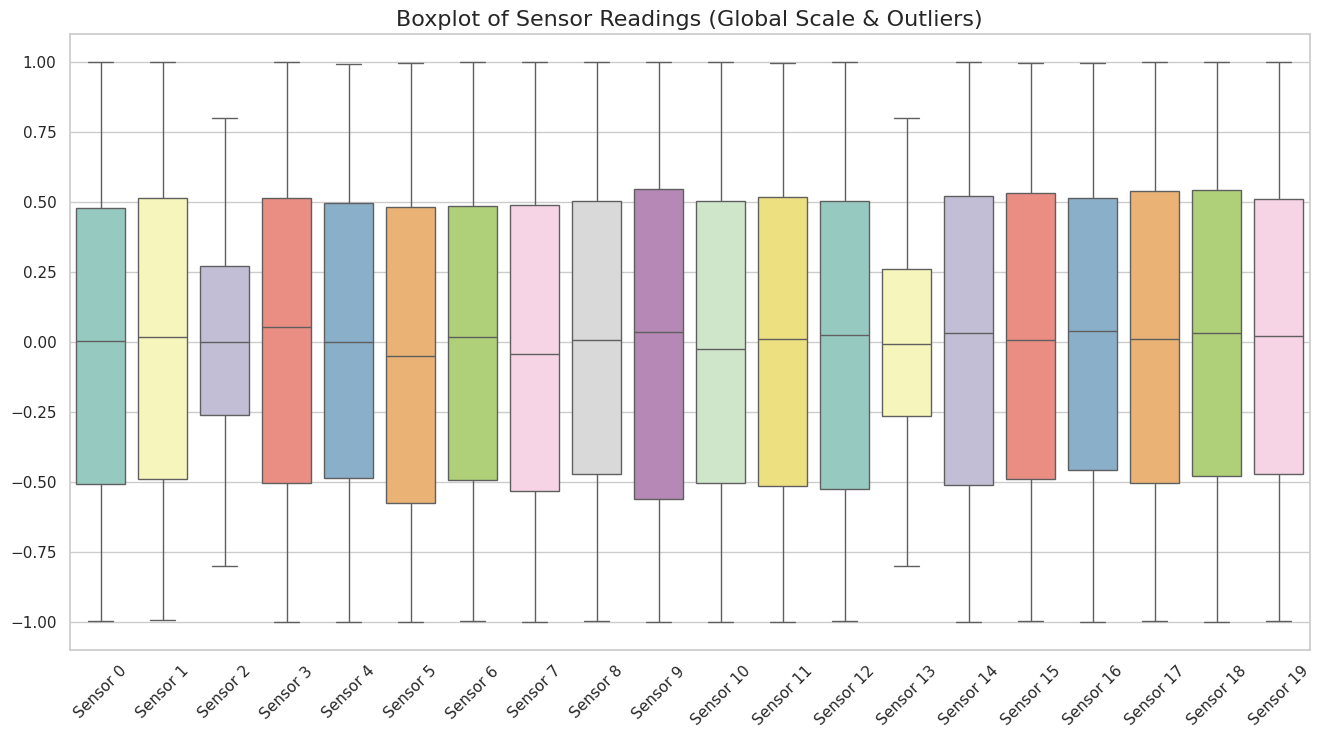

In [ ]:
# B. Boxplots for Feature Scale and Outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[sensor_cols], palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of Sensor Readings (Global Scale & Outliers)', fontsize=16)
plt.savefig('eda_boxplots.png')

/tmp/ipython-input-2197335952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


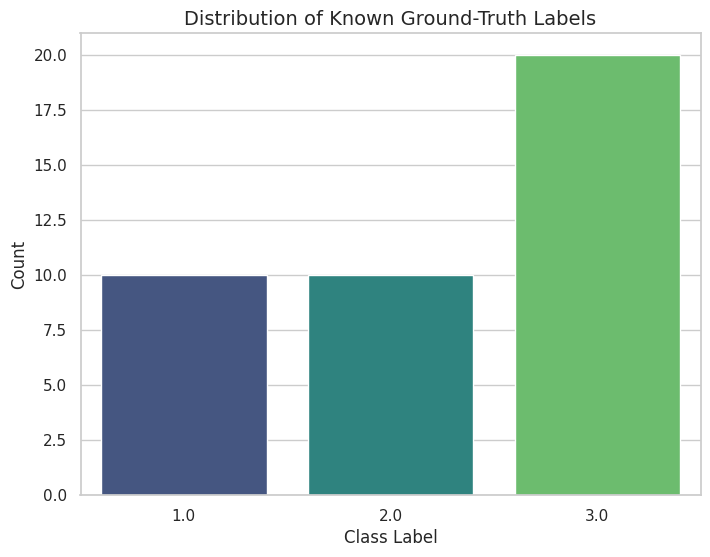

In [ ]:
# C. Label Distribution
# Important to see how many samples we actually have for semi-supervised training
plt.figure(figsize=(8, 6))
label_counts = df['Label'].value_counts(dropna=True)
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Known Ground-Truth Labels', fontsize=14)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.savefig('eda_label_distribution.png')

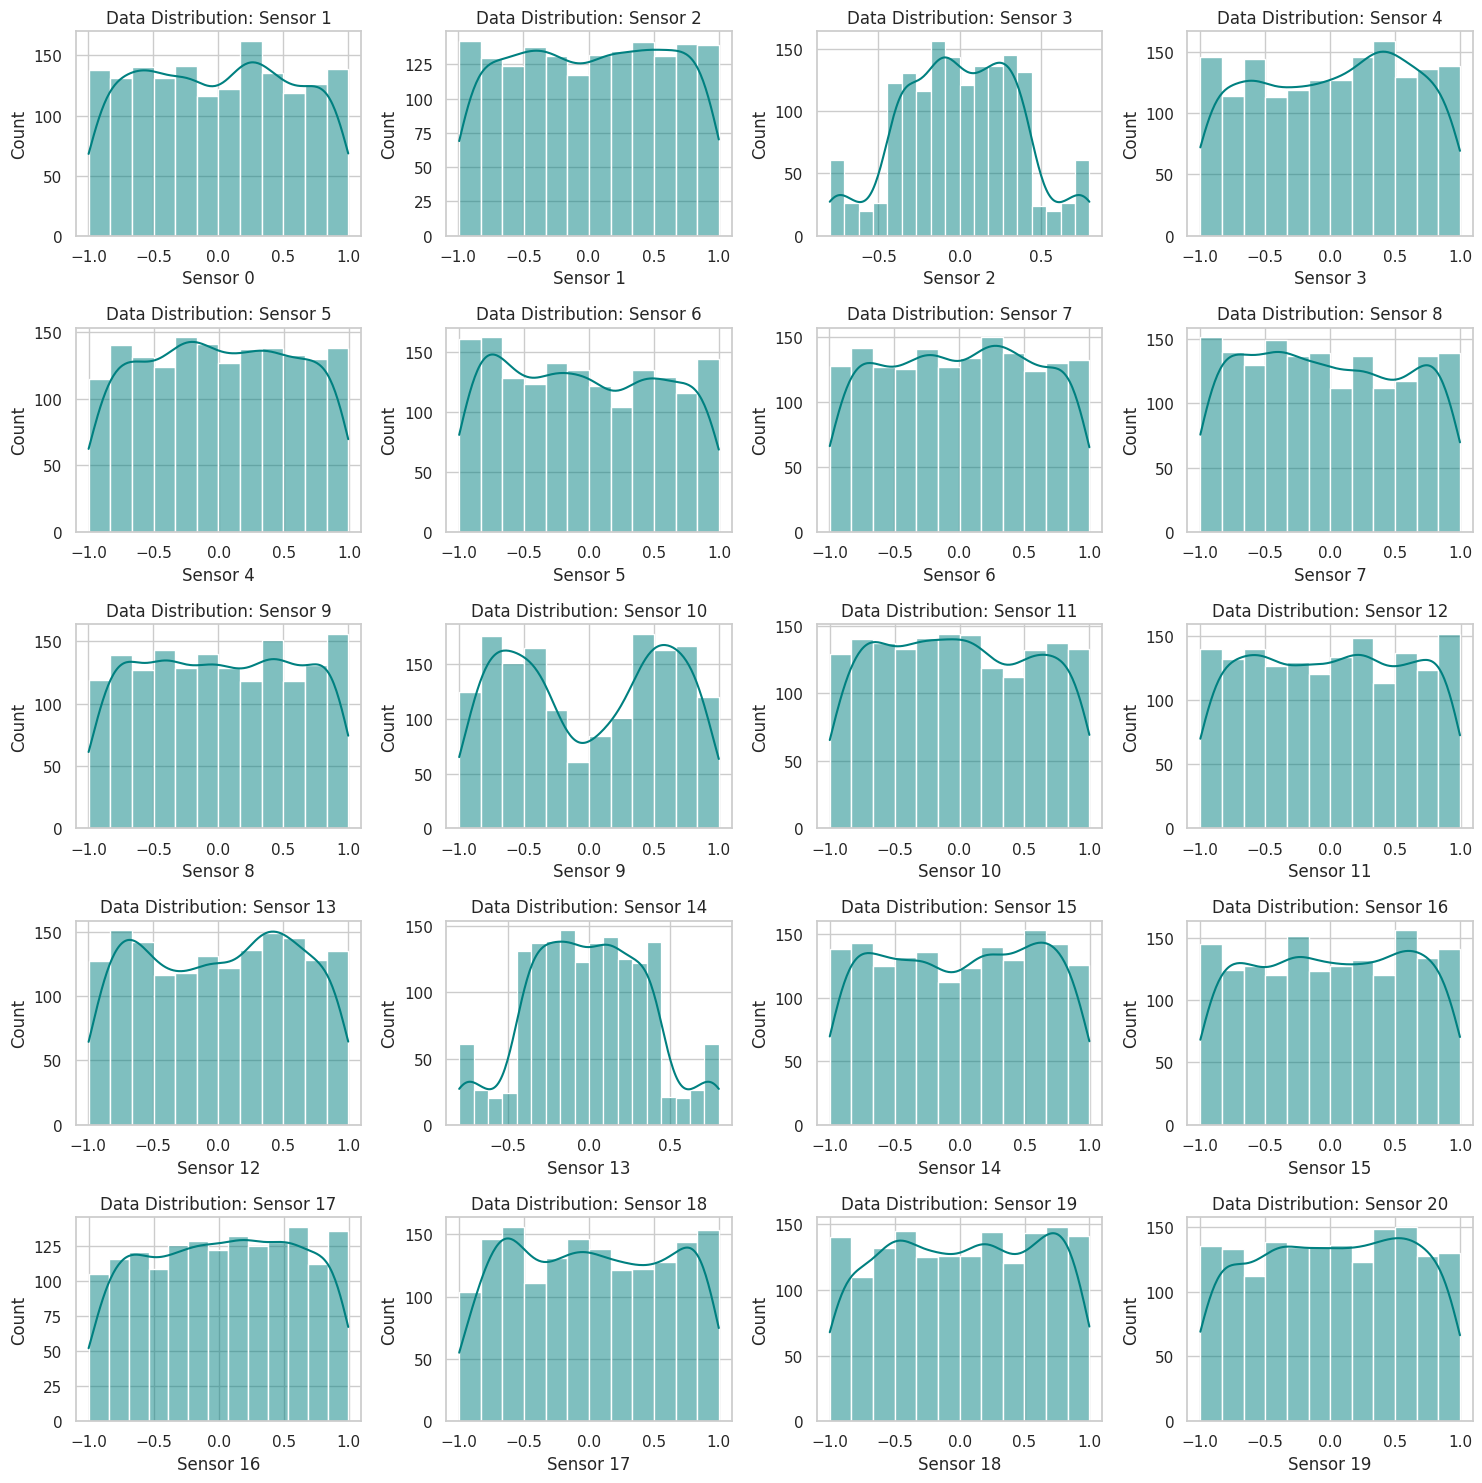

In [ ]:
# D. Feature Distributions (Sample of first 4 sensors)
plt.figure(figsize=(15, 15))
for i in range(1, len(df.columns)):
    plt.subplot(5, 4, i)
    sns.histplot(df[f'Sensor {i-1}'], kde=True, color='teal')
    plt.title(f'Data Distribution: Sensor {i}')
plt.tight_layout()
plt.savefig('eda_sensor_distributions.png')

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare the data for PCA (sensor columns only)
X = df[sensor_cols].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=None) # Keep all components to inspect explained variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative explained variance:")
for i, ratio in enumerate(cumulative_variance):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Explained variance ratio for each component:
Principal Component 1: 0.0611
Principal Component 2: 0.0589
Principal Component 3: 0.0574
Principal Component 4: 0.0556
Principal Component 5: 0.0547
Principal Component 6: 0.0536
Principal Component 7: 0.0528
Principal Component 8: 0.0518
Principal Component 9: 0.0516
Principal Component 10: 0.0509
Principal Component 11: 0.0492
Principal Component 12: 0.0481
Principal Component 13: 0.0476
Principal Component 14: 0.0457
Principal Component 15: 0.0456
Principal Component 16: 0.0448
Principal Component 17: 0.0444
Principal Component 18: 0.0431
Principal Component 19: 0.0422
Principal Component 20: 0.0408

Cumulative explained variance:
Principal Component 1: 0.0611
Principal Component 2: 0.1200
Principal Component 3: 0.1774
Principal Component 4: 0.2330
Principal Component 5: 0.2877
Principal Component 6: 0.3413
Principal Component 7: 0.3942
Principal Component 8: 0.4460
Principal Component 9: 0.4976
Principal Component 10: 0.5485
Principal C

### Explained Variance Plot

Let's visualize the explained variance to determine the optimal number of components.

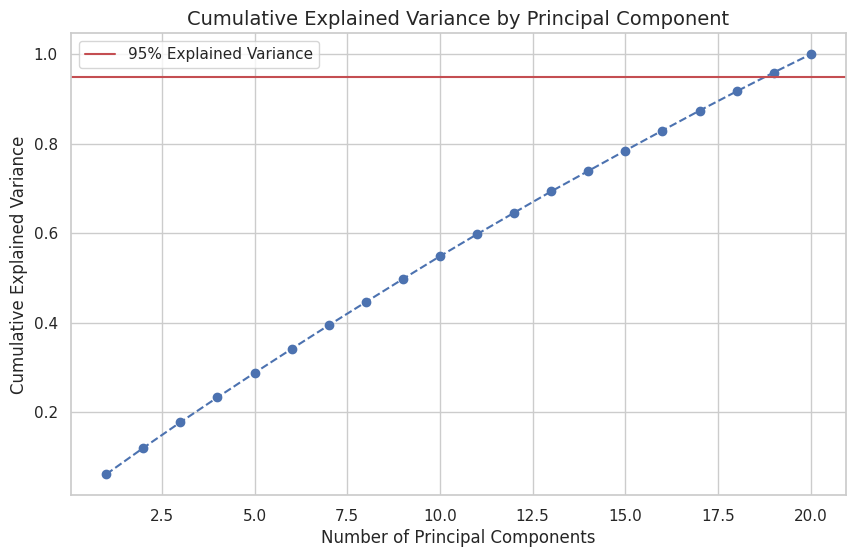

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.savefig('eda_pca_explained_variance.png')
plt.show()

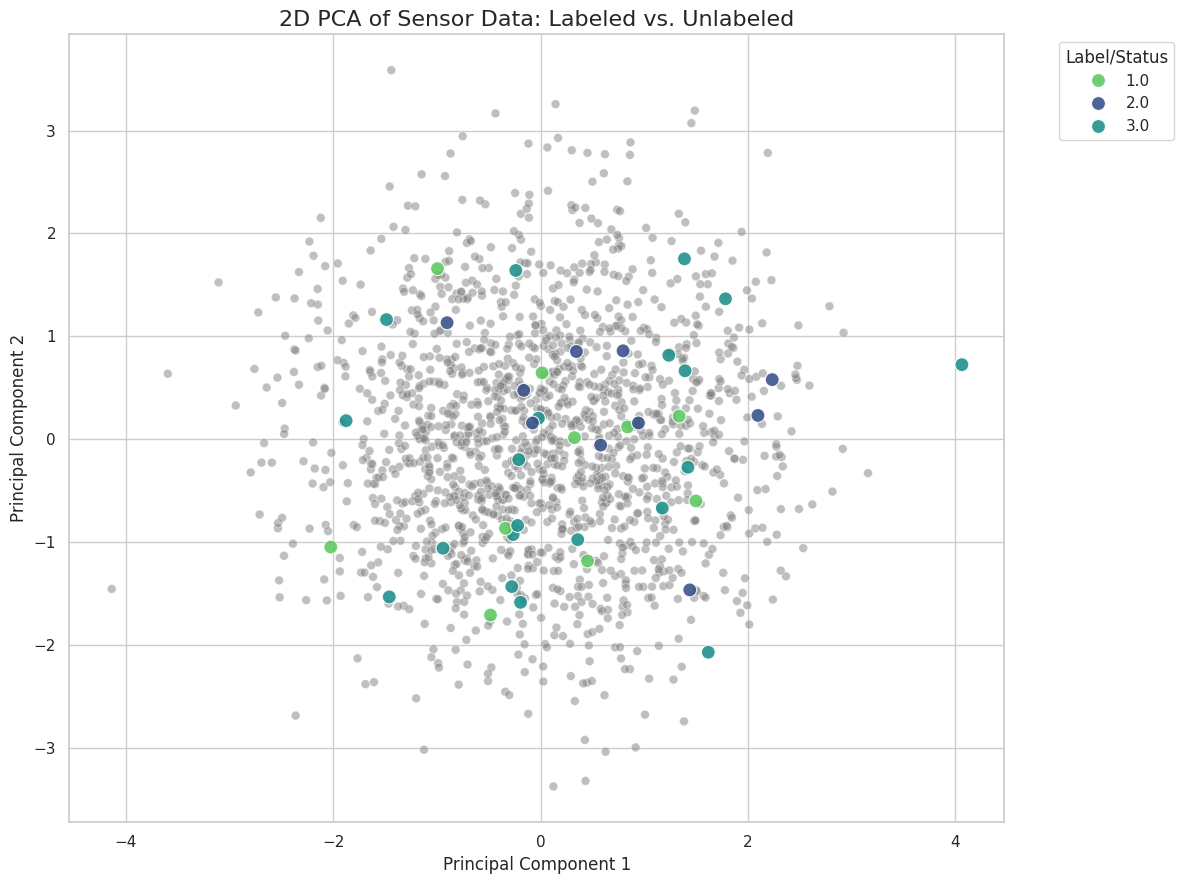

In [35]:
# Visualize the data using the first two principal components

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data = X_pca[:,0:2], columns = ['Principal Component 1', 'Principal Component 2'])

# Create a new column for plotting: use original labels or 'Unlabeled' for NaNs
pca_df['Display_Label'] = df['Label'].fillna('Unlabeled').astype(str)

plt.figure(figsize=(12, 9))

# Get unique labels to configure a suitable palette
unique_labels = pca_df['Display_Label'].unique()
unique_labels.sort()

num_labeled_classes = df['Label'].nunique()

# Define a custom palette
custom_palette = {}
hue_order_list = []

if 'Unlabeled' in unique_labels and num_labeled_classes > 0:
    colors_for_labels = sns.color_palette('viridis', n_colors=num_labeled_classes)
    custom_palette = {str(label): color for label, color in zip(df['Label'].dropna().unique().astype(str), colors_for_labels)}
    custom_palette['Unlabeled'] = '#808080' # Grey for unlabeled
    hue_order_list = [str(label) for label in sorted(df['Label'].dropna().unique())] + ['Unlabeled']
elif num_labeled_classes > 0:
    custom_palette = sns.color_palette('viridis', n_colors=num_labeled_classes)
    hue_order_list = [str(label) for label in sorted(df['Label'].dropna().unique())]
else:
    custom_palette = {'Unlabeled': '#808080'}
    hue_order_list = ['Unlabeled']


# Separate labeled and unlabeled data for plotting with different prominences
unlabeled_df = pca_df[pca_df['Display_Label'] == 'Unlabeled']
labeled_df = pca_df[pca_df['Display_Label'] != 'Unlabeled']

# Plot unlabeled points first (less prominent)
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Display_Label',
    palette={'Unlabeled': custom_palette['Unlabeled']},
    hue_order=['Unlabeled'],
    data=unlabeled_df,
    s=40, # Smaller size for unlabeled
    alpha=0.5, # Lower alpha for unlabeled
    legend=False # No legend for unlabeled here, it will be added for all below
)

# Plot labeled points on top (more prominent)
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Display_Label',
    palette={label: custom_palette[label] for label in hue_order_list if label != 'Unlabeled'},
    hue_order=[label for label in hue_order_list if label != 'Unlabeled'],
    data=labeled_df,
    s=100, # Larger size for labeled
    alpha=0.9, # Higher alpha for labeled
    legend='full' # Show full legend for all categories
)

plt.title('2D PCA of Sensor Data: Labeled vs. Unlabeled', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Label/Status', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.savefig('eda_pca_2d_visualization.png')
plt.show()

In [36]:
# Install UMAP-learn if not already installed
!pip install umap-learn

In [37]:
import umap

# Perform UMAP dimensionality reduction on the scaled data
reducer = umap.UMAP(n_components=2, random_state=42) # Using 2 components for 2D visualization
X_umap = reducer.fit_transform(X_scaled)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(data=X_umap, columns=['UMAP Component 1', 'UMAP Component 2'])

# Add the 'Label' column for visualization
umap_df['Display_Label'] = df['Label'].fillna('Unlabeled').astype(str)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


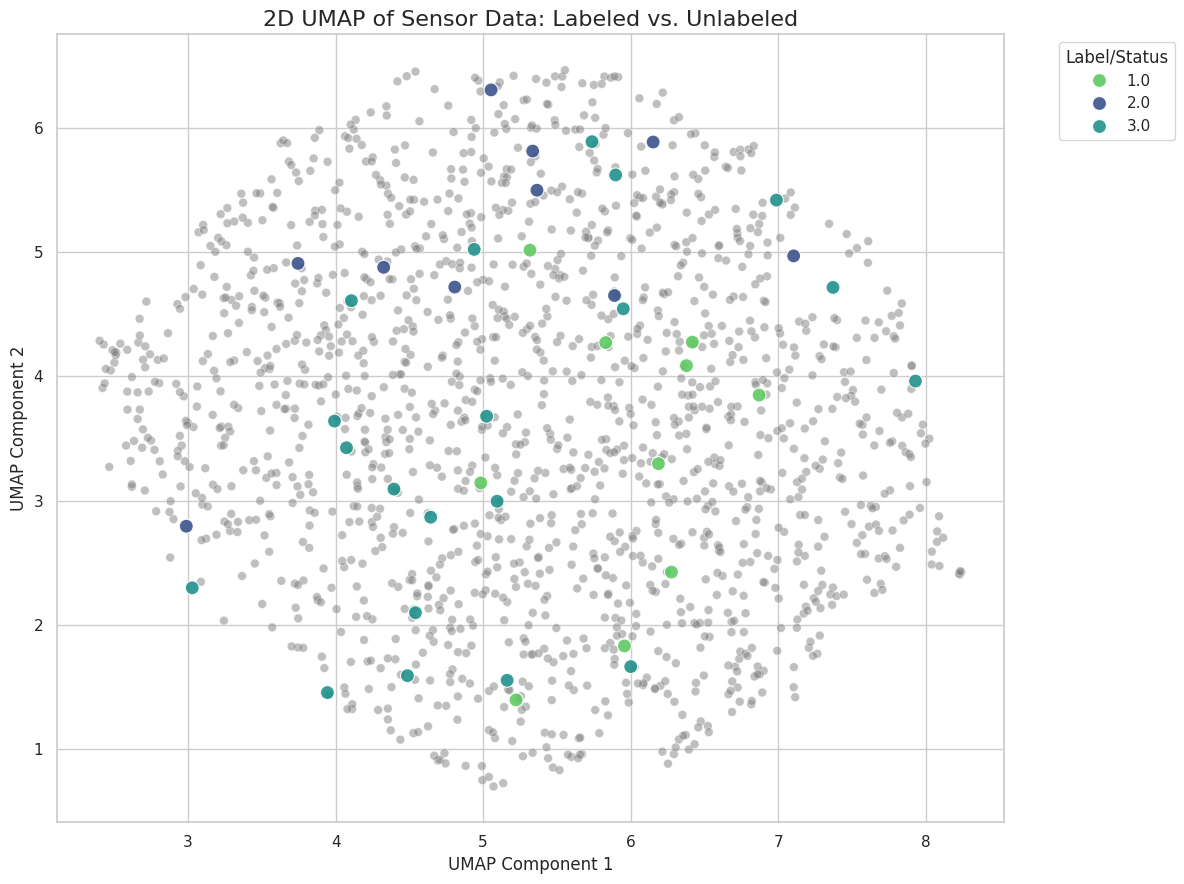

In [38]:
plt.figure(figsize=(12, 9))

# Get unique labels to configure a suitable palette
unique_labels_umap = umap_df['Display_Label'].unique()
unique_labels_umap.sort()

num_labeled_classes_umap = df['Label'].nunique()

# Define a custom palette for UMAP visualization
custom_palette_umap = {}
hue_order_list_umap = []

if 'Unlabeled' in unique_labels_umap and num_labeled_classes_umap > 0:
    colors_for_labels_umap = sns.color_palette('viridis', n_colors=num_labeled_classes_umap)
    custom_palette_umap = {str(label): color for label, color in zip(df['Label'].dropna().unique().astype(str), colors_for_labels_umap)}
    custom_palette_umap['Unlabeled'] = '#808080' # Grey for unlabeled
    hue_order_list_umap = [str(label) for label in sorted(df['Label'].dropna().unique())] + ['Unlabeled']
elif num_labeled_classes_umap > 0:
    custom_palette_umap = sns.color_palette('viridis', n_colors=num_labeled_classes_umap)
    hue_order_list_umap = [str(label) for label in sorted(df['Label'].dropna().unique())]
else:
    custom_palette_umap = {'Unlabeled': '#808080'}
    hue_order_list_umap = ['Unlabeled']

# Separate labeled and unlabeled data for plotting with different prominences
unlabeled_df_umap = umap_df[umap_df['Display_Label'] == 'Unlabeled']
labeled_df_umap = umap_df[umap_df['Display_Label'] != 'Unlabeled']

# Plot unlabeled points first (less prominent)
sns.scatterplot(
    x='UMAP Component 1',
    y='UMAP Component 2',
    hue='Display_Label',
    palette={'Unlabeled': custom_palette_umap['Unlabeled']},
    hue_order=['Unlabeled'],
    data=unlabeled_df_umap,
    s=40, # Smaller size for unlabeled
    alpha=0.5, # Lower alpha for unlabeled
    legend=False # No legend for unlabeled here, it will be added for all below
)

# Plot labeled points on top (more prominent)
sns.scatterplot(
    x='UMAP Component 1',
    y='UMAP Component 2',
    hue='Display_Label',
    palette={label: custom_palette_umap[label] for label in hue_order_list_umap if label != 'Unlabeled'},
    hue_order=[label for label in hue_order_list_umap if label != 'Unlabeled'],
    data=labeled_df_umap,
    s=100, # Larger size for labeled
    alpha=0.9, # Higher alpha for labeled
    legend='full' # Show full legend for all categories
)

plt.title('2D UMAP of Sensor Data: Labeled vs. Unlabeled', fontsize=16)
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Label/Status', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.savefig('eda_umap_2d_visualization.png')
plt.show()

In [41]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction on the scaled data
# Note: t-SNE is computationally more intensive and might take longer for larger datasets.
# Perplexity is an important parameter; a value between 5 and 50 is common.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=5000)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add the 'Label' column for visualization
tsne_df['Display_Label'] = df['Label'].fillna('Unlabeled').astype(str)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


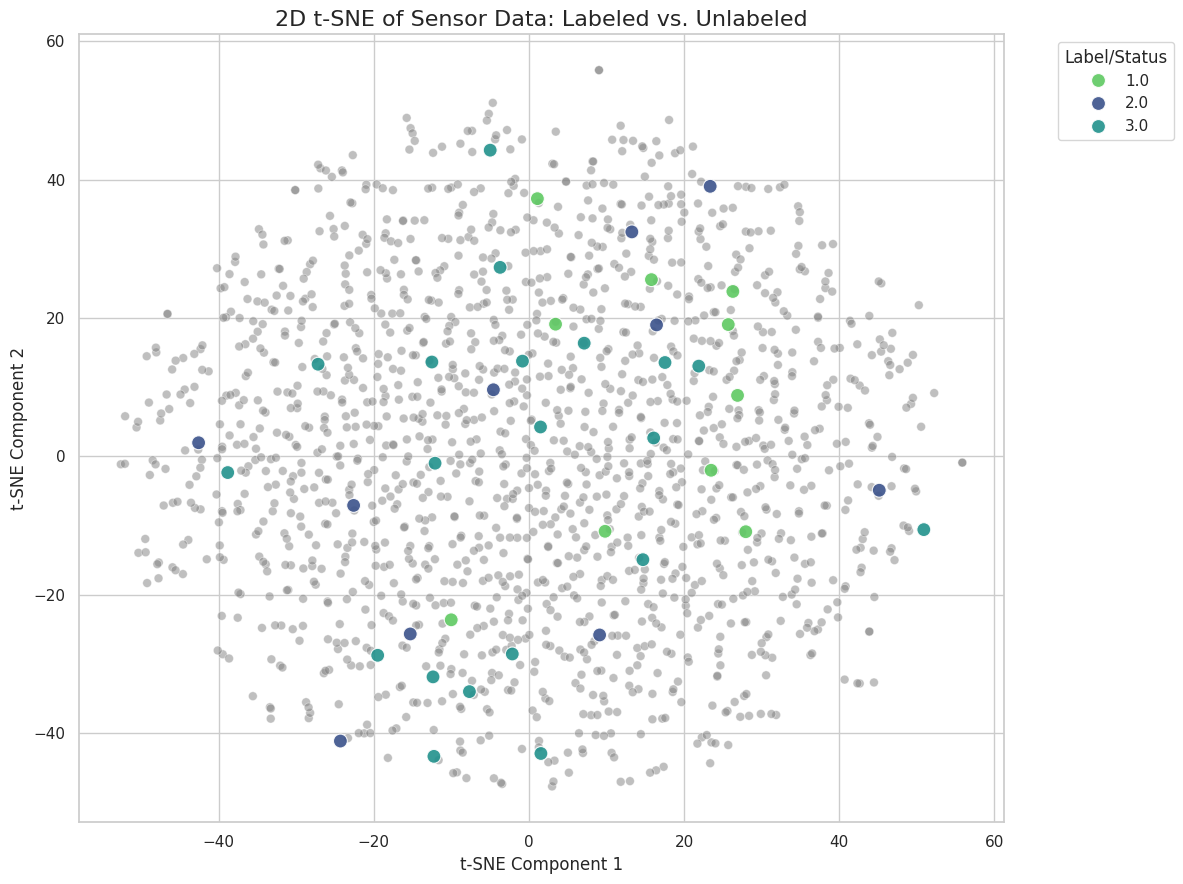

In [42]:
plt.figure(figsize=(12, 9))

# Get unique labels to configure a suitable palette
unique_labels_tsne = tsne_df['Display_Label'].unique()
unique_labels_tsne.sort()

num_labeled_classes_tsne = df['Label'].nunique()

# Define a custom palette for t-SNE visualization
custom_palette_tsne = {}
hue_order_list_tsne = []

if 'Unlabeled' in unique_labels_tsne and num_labeled_classes_tsne > 0:
    colors_for_labels_tsne = sns.color_palette('viridis', n_colors=num_labeled_classes_tsne)
    custom_palette_tsne = {str(label): color for label, color in zip(df['Label'].dropna().unique().astype(str), colors_for_labels_tsne)}
    custom_palette_tsne['Unlabeled'] = '#808080' # Grey for unlabeled
    hue_order_list_tsne = [str(label) for label in sorted(df['Label'].dropna().unique())] + ['Unlabeled']
elif num_labeled_classes_tsne > 0:
    custom_palette_tsne = sns.color_palette('viridis', n_colors=num_labeled_classes_tsne)
    hue_order_list_tsne = [str(label) for label in sorted(df['Label'].dropna().unique())]
else:
    custom_palette_tsne = {'Unlabeled': '#808080'}
    hue_order_list_tsne = ['Unlabeled']

# Separate labeled and unlabeled data for plotting with different prominences
unlabeled_df_tsne = tsne_df[tsne_df['Display_Label'] == 'Unlabeled']
labeled_df_tsne = tsne_df[tsne_df['Display_Label'] != 'Unlabeled']

# Plot unlabeled points first (less prominent)
sns.scatterplot(
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    hue='Display_Label',
    palette={'Unlabeled': custom_palette_tsne['Unlabeled']},
    hue_order=['Unlabeled'],
    data=unlabeled_df_tsne,
    s=40, # Smaller size for unlabeled
    alpha=0.5, # Lower alpha for unlabeled
    legend=False # No legend for unlabeled here, it will be added for all below
)

# Plot labeled points on top (more prominent)
sns.scatterplot(
    x='t-SNE Component 1',
    y='t-SNE Component 2',
    hue='Display_Label',
    palette={label: custom_palette_tsne[label] for label in hue_order_list_tsne if label != 'Unlabeled'},
    hue_order=[label for label in hue_order_list_tsne if label != 'Unlabeled'],
    data=labeled_df_tsne,
    s=100, # Larger size for labeled
    alpha=0.9, # Higher alpha for labeled
    legend='full' # Show full legend for all categories
)

plt.title('2D t-SNE of Sensor Data: Labeled vs. Unlabeled', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Label/Status', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.savefig('eda_tsne_2d_visualization.png')
plt.show()